In [2]:
#create datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set seaborn style
sns.set(style="whitegrid")

# Custom Dataset Generators
rng = np.random.default_rng(42)

def generate_students(n=200, seed=42):
    rng = np.random.default_rng(seed)
    hours_studied = rng.normal(5, 2, n).clip(1, 10)
    marks = (hours_studied * rng.uniform(8, 12, n) + rng.normal(0, 5, n)).clip(30, 100)
    gender = rng.choice(['Male', 'Female'], n)
    subject = rng.choice(['Math', 'Science', 'English', 'History'], n)
    study_method = rng.choice(['Solo', 'Group'], n, p=[0.6, 0.4])
    attempts = rng.integers(1, 4, n)
    return pd.DataFrame({
        'hours_studied': hours_studied.round(2),
        'marks': marks.round(2),
        'gender': gender,
        'subject': subject,
        'study_method': study_method,
        'attempts': attempts
    })

def generate_daily_sales(n=60, seed=42):
    rng = np.random.default_rng(seed)
    base = pd.date_range(start='2024-01-01', periods=n, freq='D')
    trend = np.linspace(50, 80, n)
    season = 8 * np.sin(np.linspace(0, 3*np.pi, n))
    noise = rng.normal(0, 3, n)
    sales = (trend + season + noise).round(2)
    return pd.DataFrame({'date': base, 'sales': sales})

# Generate data
students = generate_students(220)
sales = generate_daily_sales(90)



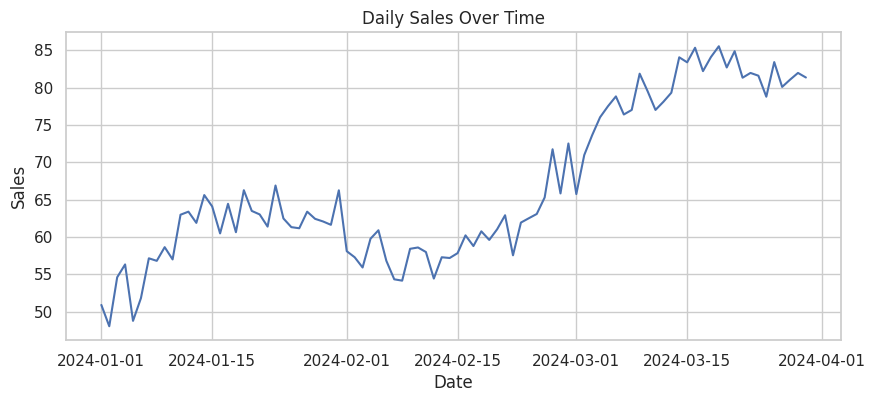

In [3]:
plt.figure(figsize=(10,4))
sns.lineplot(x='date', y='sales', data=sales)
plt.title("Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

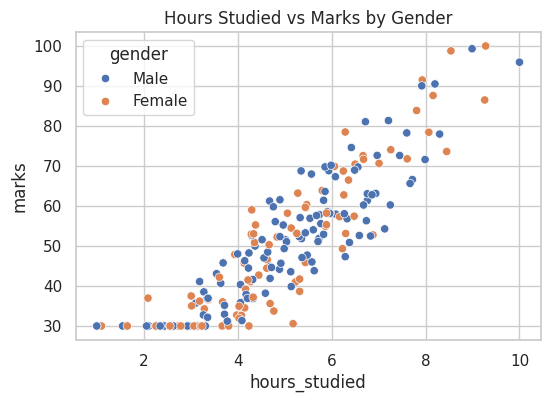

In [4]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='hours_studied', y='marks', hue='gender', data=students)
plt.title("Hours Studied vs Marks by Gender")
plt.show()


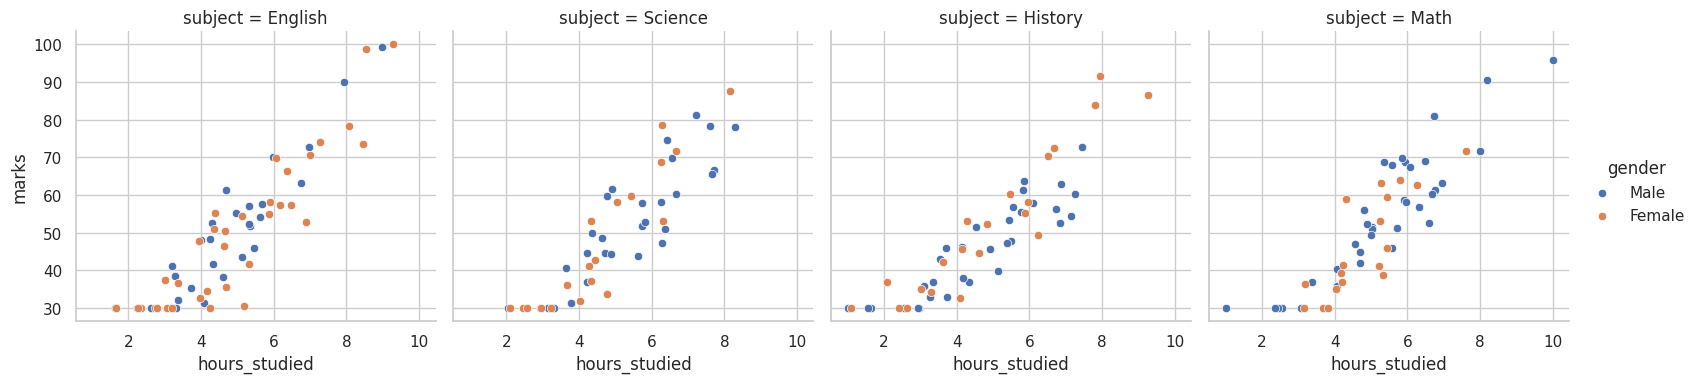

In [5]:
g = sns.FacetGrid(students, col='subject', hue='gender', height=4)
g.map(sns.scatterplot, 'hours_studied', 'marks').add_legend()
plt.show()


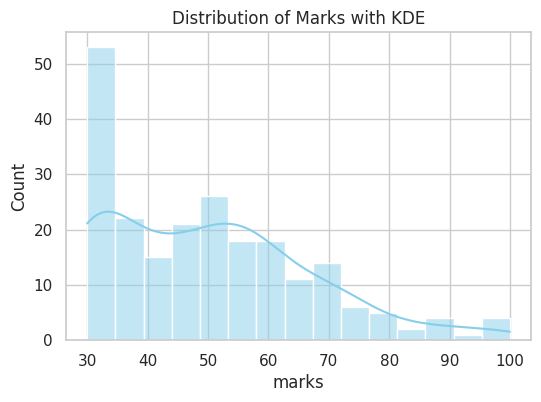

In [6]:
plt.figure(figsize=(6,4))
sns.histplot(students['marks'], kde=True, bins=15, color='skyblue')
plt.title("Distribution of Marks with KDE")
plt.show()


/tmp/ipython-input-2356836875.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(students['hours_studied'], shade=True, color='orange')


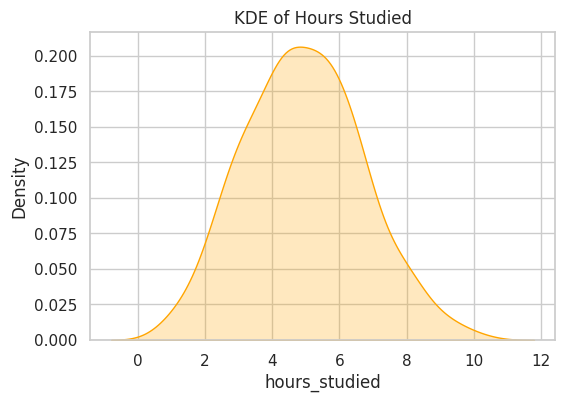

In [7]:
plt.figure(figsize=(6,4))
sns.kdeplot(students['hours_studied'], shade=True, color='orange')
plt.title("KDE of Hours Studied")
plt.show()

In [8]:
subject_counts = students['subject'].value_counts()
print("Records per subject:\n", subject_counts)

Records per subject:
 subject
English    63
History    54
Math       54
Science    49
Name: count, dtype: int64


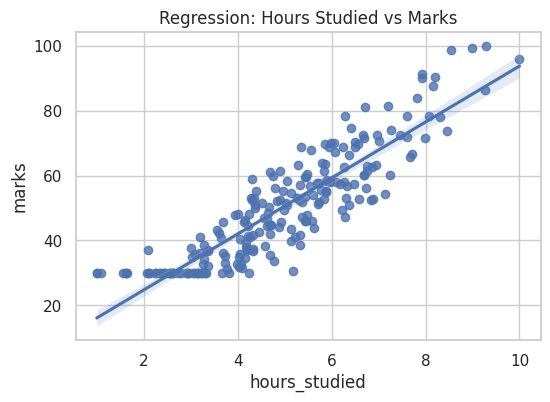

In [9]:
plt.figure(figsize=(6,4))
sns.regplot(x='hours_studied', y='marks', data=students)
plt.title("Regression: Hours Studied vs Marks")
plt.show()


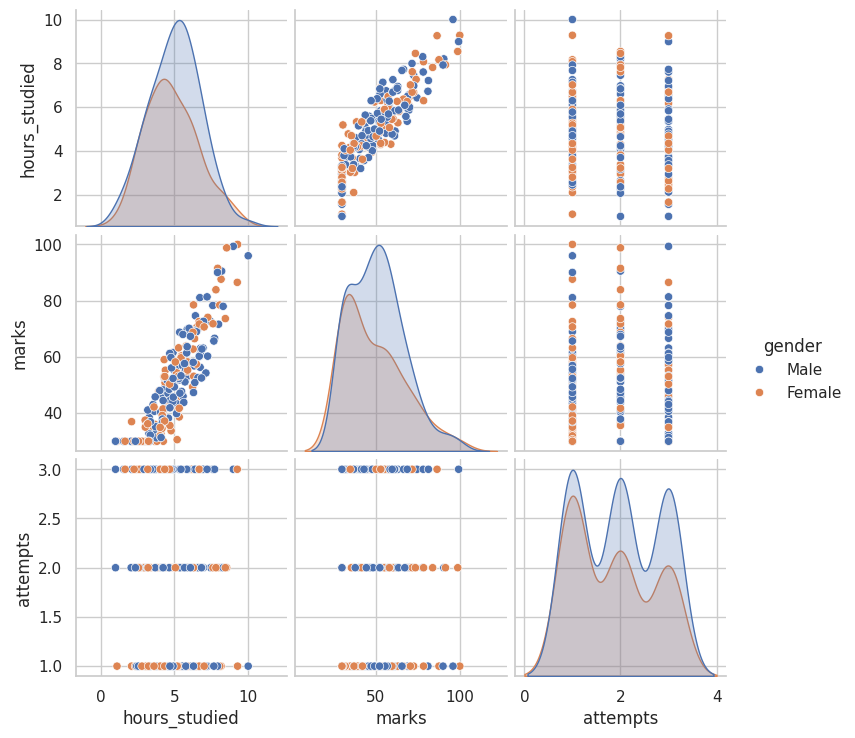

In [10]:
sns.pairplot(students, hue='gender')
plt.show()

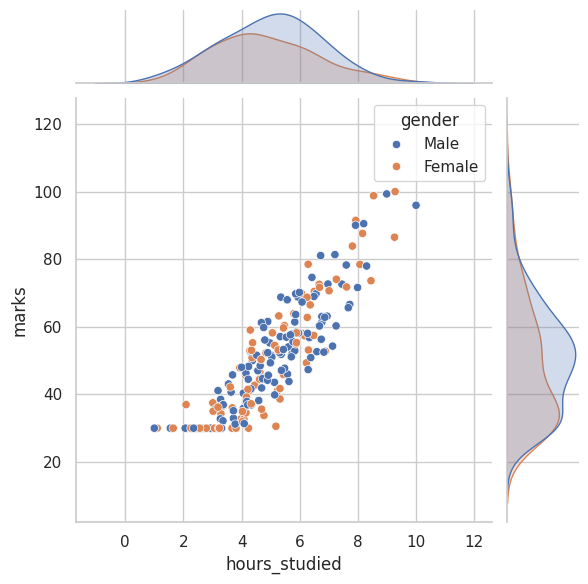

In [11]:
sns.jointplot(x='hours_studied', y='marks', data=students, kind='scatter', hue='gender')
plt.show()

In [12]:
fig = px.scatter(students, x='hours_studied', y='marks', color='gender',
                 title="Hours Studied vs Marks (Plotly)")
fig.show()

fig = px.line(sales, x='date', y='sales', title="Daily Sales Over Time")
fig.show()

fig = px.histogram(students, x='marks', nbins=15, marginal='box', title="Marks Distribution")
fig.show()